# Titanic Survival Prediction

Using passenger data from the titanic, We will make a model to predict which passengers would survive.

In [281]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree

### Read in and analyse the data:

In [282]:
df = pd.read_csv('titanic_train.csv')

In [283]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [285]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [286]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [287]:
df.shape

(891, 12)

In [288]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has 891 rows of data and 12 columns. Age, Embarked and cabin have null values. Five of the columns are non-numerical.

## Visualisations:
Counts and Visualisation of each separate column:

PASSENGERID:
Counts:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


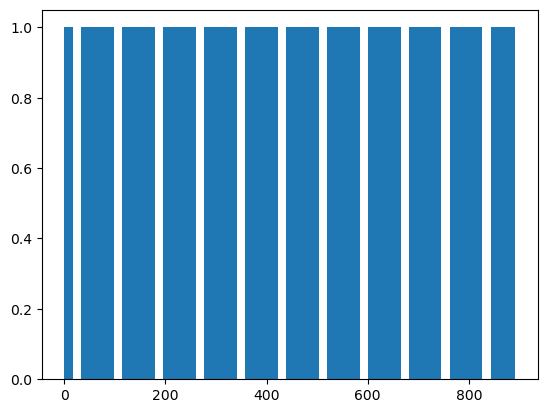

SURVIVED:
Counts:
0    549
1    342
Name: Survived, dtype: int64


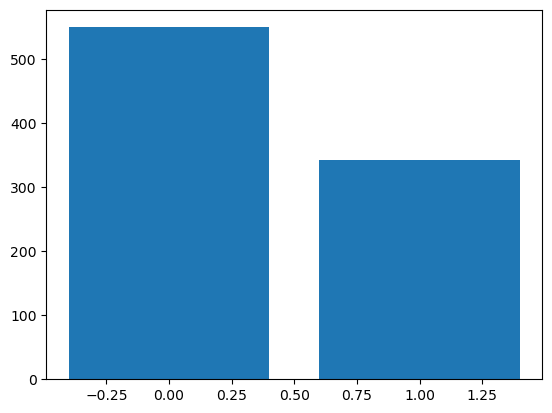

PCLASS:
Counts:
3    491
1    216
2    184
Name: Pclass, dtype: int64


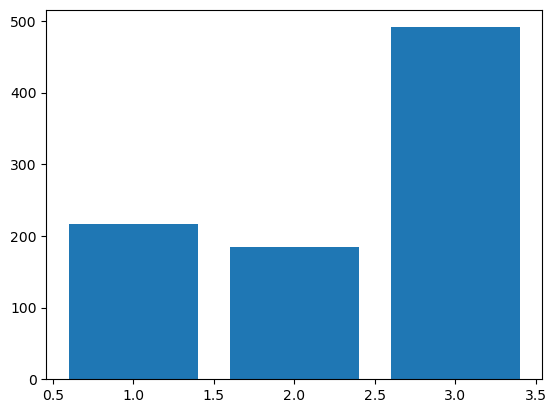

NAME:
Counts:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


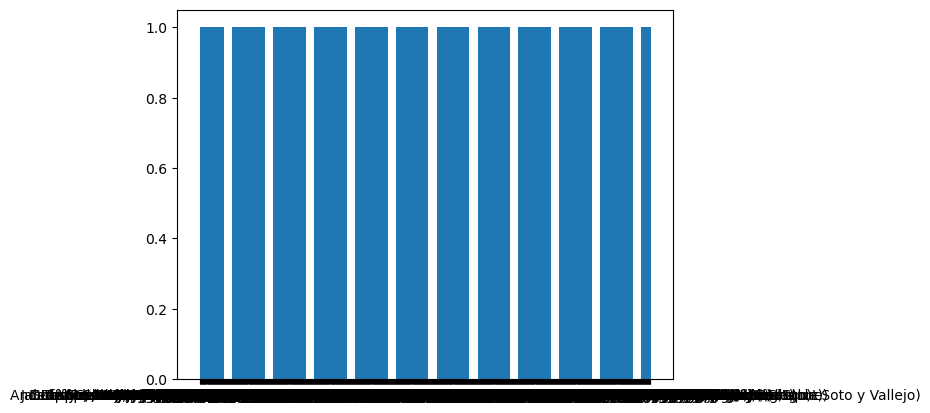

SEX:
Counts:
male      577
female    314
Name: Sex, dtype: int64


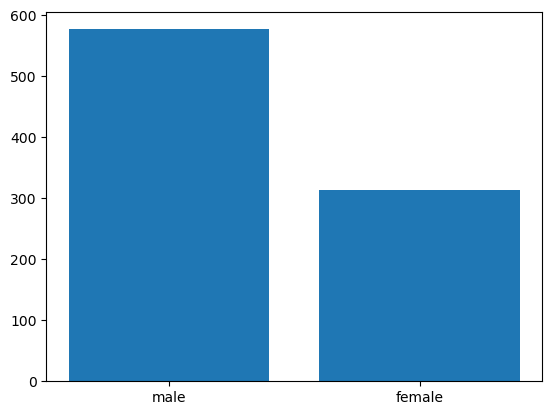

AGE:
Counts:
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


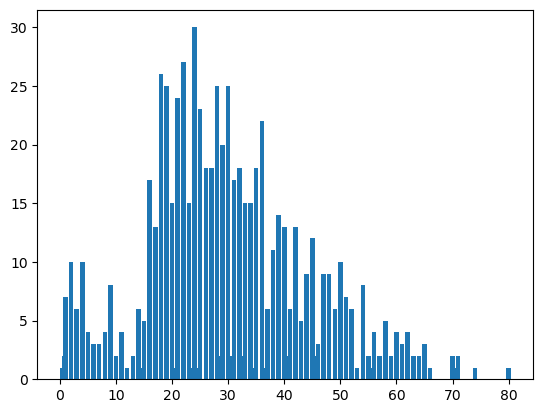

SIBSP:
Counts:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


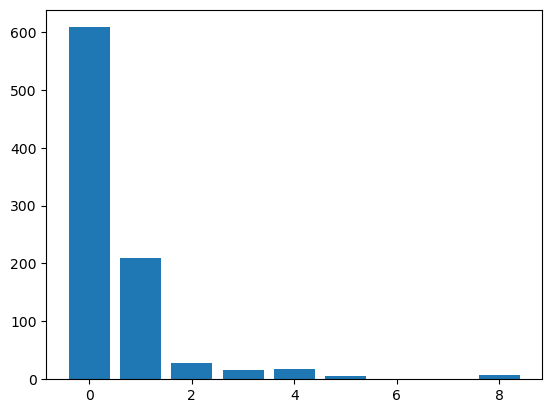

PARCH:
Counts:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


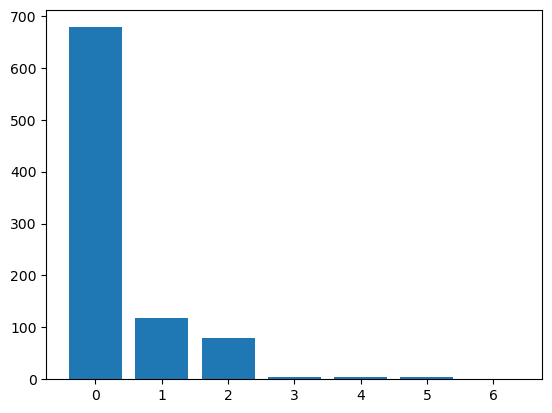

TICKET:
Counts:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


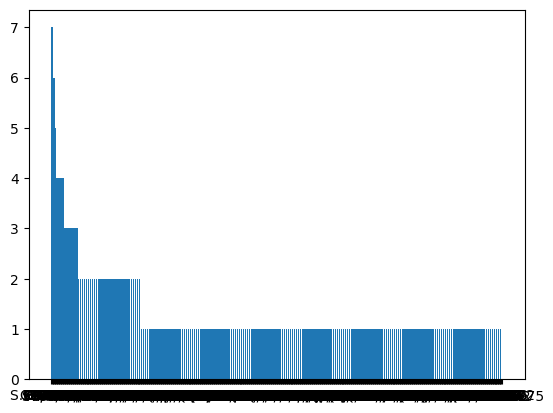

FARE:
Counts:
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


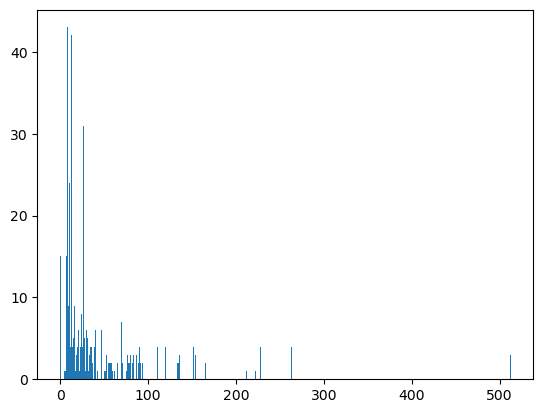

CABIN:
Counts:
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


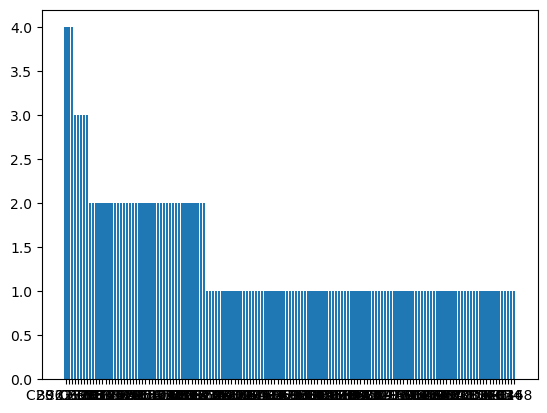

EMBARKED:
Counts:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


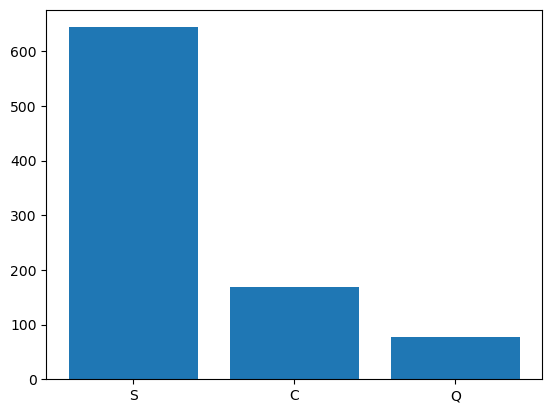

In [289]:
def column_analysis(col):
    counts = df[col].value_counts()
    print('Counts:')
    print(counts)
    plt.bar(counts.index, counts.values)
    plt.show()
    
for col in df.columns:
    print(col.upper() + ':')
    column_analysis(col)

### Closer analysis on each column:

#### Passenger ID, Name, and Ticket Number:
These columns do not give us any information relevant to survival, so we will drop them. We may, however still want to use them with other column analysis so we will drop it after the analysis:

#### Survived:
This is the target column. About 38% of these passengers were survivors. It has a 0 or 1 value. It is currently a string, which we will change to numerical so we can work with it.

In [290]:
df['Survived'] = df['Survived'].astype(int)

#### PClass:
This column tells us what class the passenger travelled in.
Over half of the passengers in this data were in third class, with about a quarter in first class, and 20% in second class. 
We would assume this has an affect on the survival rate as passengers closer to deck may have been more likely to escape, whereas those down below may have been trapped.
We will check this below with a visualisation:

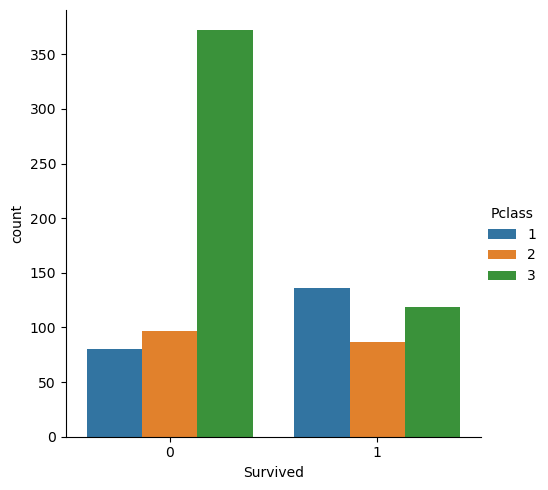

In [291]:
sns.catplot(data = df, x = 'Survived', kind = 'count', hue = 'Pclass')

The majority of those who didn't survive were from third class. This makes sense, because there were a lot more passengers in total in third class. However, if we look at it propertionaly, we see that of first class, more people survived than didn't, second class had about a 50% survival rate, but sadly with third class, sadly only about a quarter of them survived.

#### Sex:
There are nearly double the amount of male in this data then female, which I thought may skew our data. However, after researching, I found that actually only about 22% of the passengers were female, so the data is accurate, if not slightly skewed towards women! Again, this column is very likely to affect our target because women and children were allowed on life boats first.
Below is a visualisation of the survival rate for male and female:

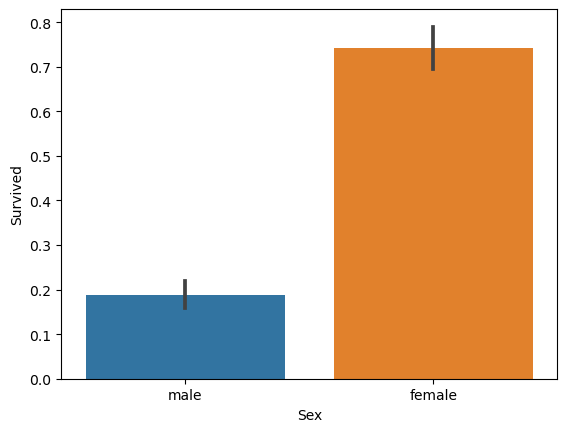

In [292]:
sns.barplot(x = df['Sex'],y = df['Survived'])
plt.show()

It is clear to see that while the majority of females survived, the majority of males did not. This is definitely a column we will keep.

Text(0.5, 1.05, 'Correlation between Sex, survival and Parch')

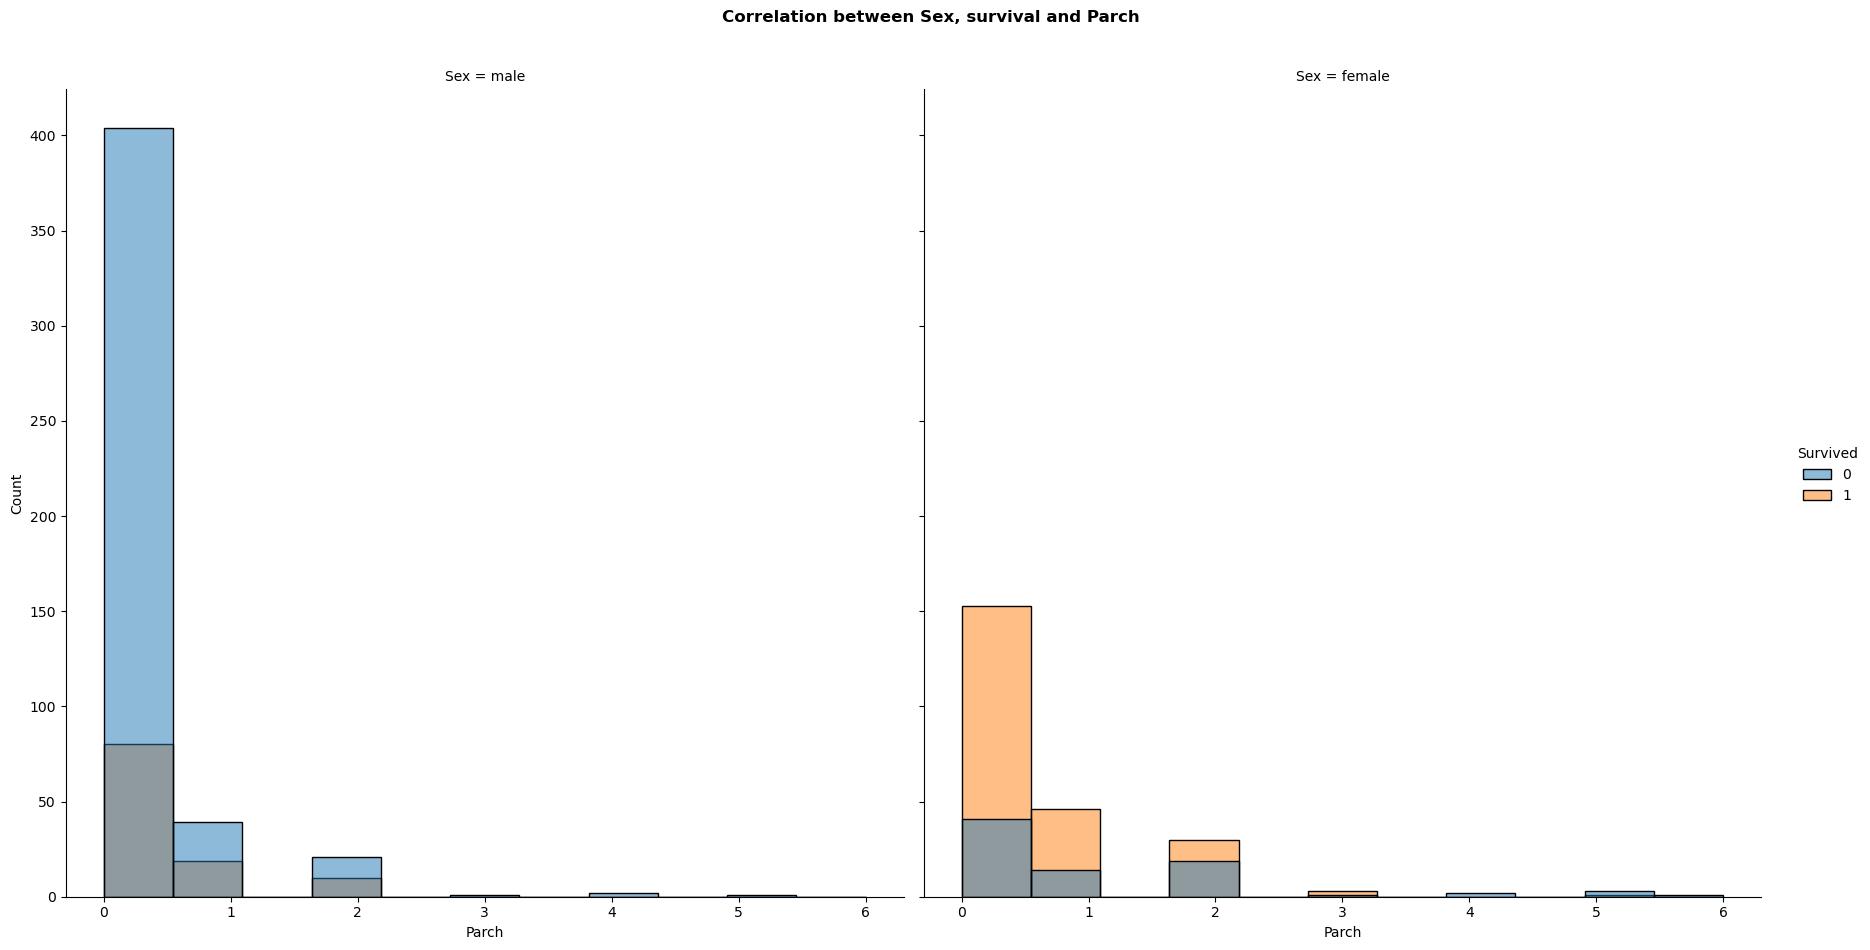

In [293]:
sns.displot(data=df,x='Parch', kde=False, col="Sex", hue="Survived", height=9)
plt.suptitle("Correlation between Sex, survival and Parch", y=1.05, weight="demi")

Above, we split the data to see the survival rate of each gender, with dependency. We already saw that males had a lower survival rate. Interestingly, we see that the males who travelled with a parent/child actually had a much higher chance of surviving!

#### Name
To check that our sex data is accurate, we can look at the title from the names column, and compare that to our sex column. We will look at the name column below:

In [294]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [295]:
# The title per person is given after a comma, and before a period. We will use this to extract just the titles, and compare the counts to the gender counts.
names = df['Name'].str.split(', ')
titles = pd.Series([n[1].split('.')[0] for n in names])
titles.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
dtype: int64

In [296]:
# The majority are either Mr, Master, Miss or Mrs. We will change these to M and F, respectively
dict = {'Mr':'M', 'Mrs':'F', 'Miss':'F', 'Master':'M'}
titles = titles.map(dict)
#find approximately how many male/female names
titles.value_counts()

M    557
F    307
dtype: int64

Although we didn't do an exact check, this fits nicely with our count of male and female, so we can assume it is pretty accurate.
As mentioned before, this row doesn't give us much information that will affect our model, so we will drop it.

#### Age: still need attention

In [297]:
df['Age'].nunique()

88

<Axes: >

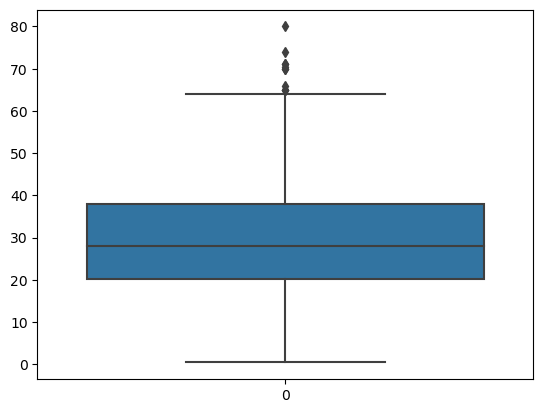

In [298]:
sns.boxplot(df["Age"])

C:\Users\Noami\AppData\Local\Temp\ipykernel_16416\360849065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True, fmt='.2f', linewidths=.5,ax=ax, cmap='Blues').set(title="Correlation Map")


[Text(0.5, 1.0, 'Correlation Map')]

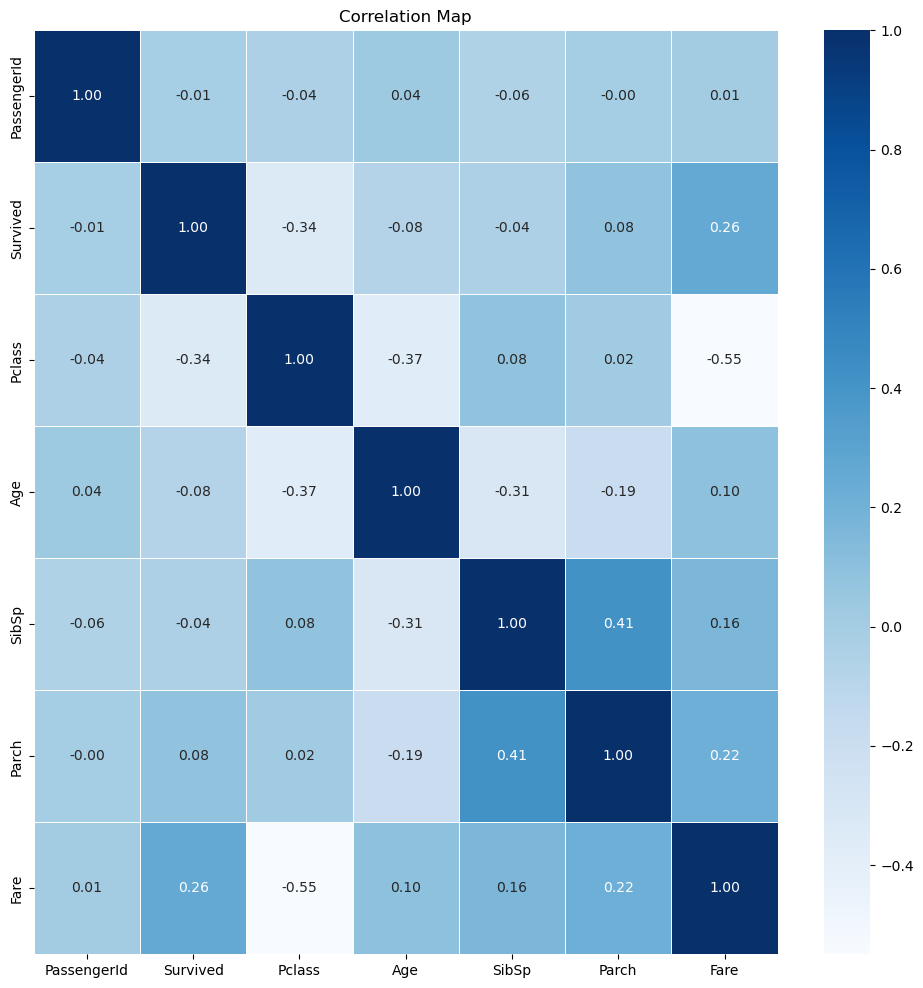

In [299]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True, fmt='.2f', linewidths=.5,ax=ax, cmap='Blues').set(title="Correlation Map")

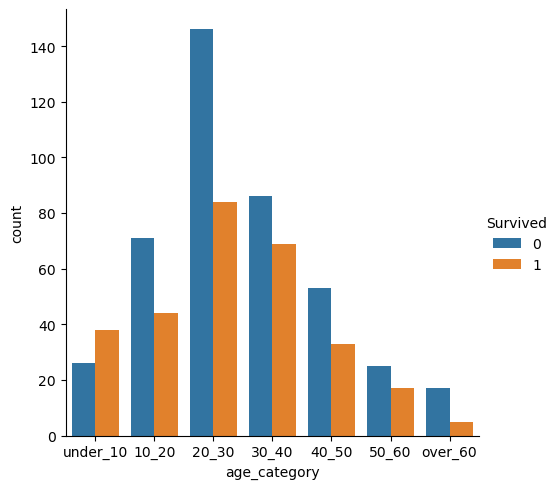

In [300]:
temp_dt = df
temp_dt['age_category'] = pd.cut(x=temp_dt['Age'], bins=[0, 10, 20, 30, 40, 50 , 60 ,81],
                     labels=['under_10', '10_20', '20_30', '30_40', '40_50', '50_60','over_60'])
sns.catplot(data = temp_dt, x = 'age_category', kind = 'count', hue = 'Survived')

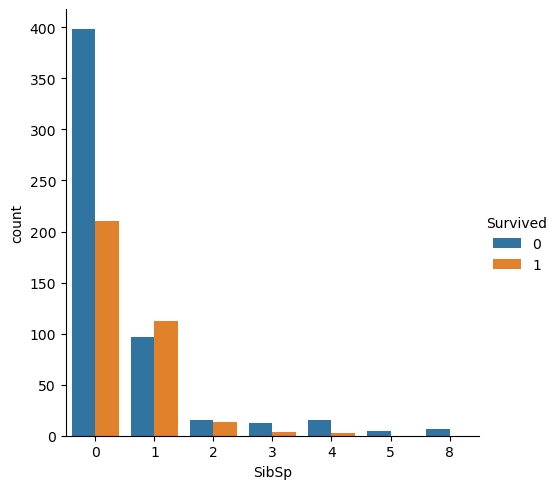

In [301]:
sns.catplot(data = df, x = 'SibSp', kind = 'count', hue = 'Survived')

The box plot seems to show a few outliers, and I also cecked the max values
and googled and found that the oldest man on the Titanic was 74. Only one row had
the age above that, so really only one outlier.

#### SibSp: - needs updating

#### Cabin:

In [302]:
df['Cabin'].value_counts().sum()

204

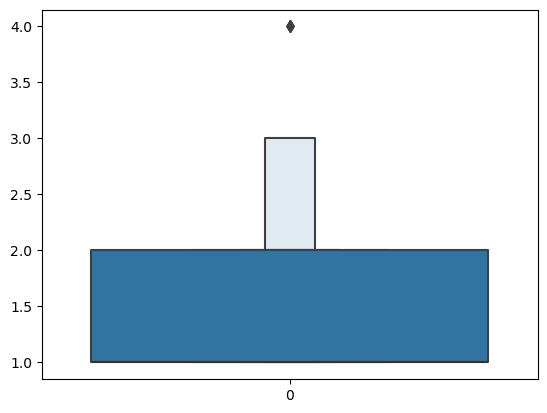

In [303]:
sns.boxenplot(df['Cabin'].value_counts())
plt.show()

In [304]:
df['Cabin'].value_counts().mean()

1.3877551020408163

There are 204 cabins. Most cabins had 1 or 2 people in them. There are also many with 3 and outlier cabins with 4 passengers.

In [305]:
#Because there are so many NANS (687) and over 200 different values in the cabin columns, it is unlikely that this column will yield any useful information to this study. As such, we choose to drop the column altogether:
df = df.drop('Cabin', axis = 1)

#### Embarked:

In [306]:
df = df[df['Embarked'].notna()]

In [307]:
df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})

In [308]:
df['Embarked'].value_counts()

1    644
2    168
3     77
Name: Embarked, dtype: int64

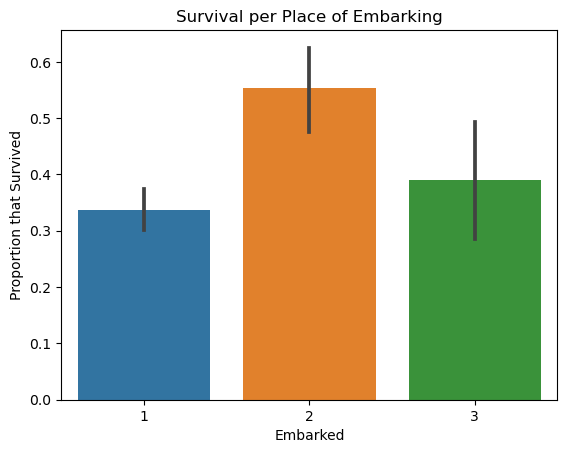

In [309]:
# showing survival rates per place of embarking
sns.barplot(x = df['Embarked'],y = df['Survived'])
plt.ylabel("Proportion that Survived")
plt.title("Survival per Place of Embarking")
plt.show()

Text(0.5, 1.0, 'Survival per Place of Embarking')

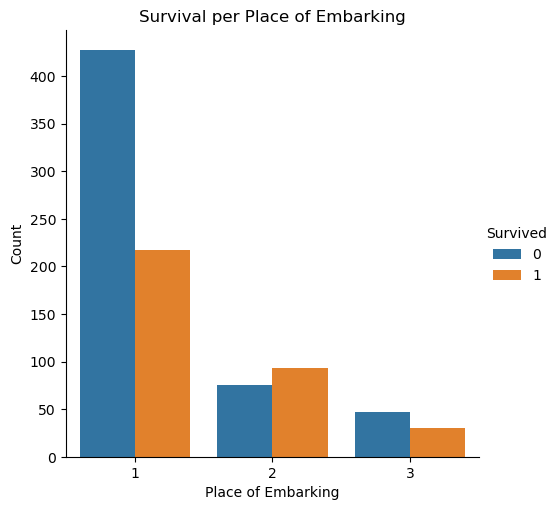

In [310]:
#comparing the amounts of survivors vs non-survivors per place of embarking:
sns.catplot(data=df, x="Embarked", kind="count", hue="Survived")
plt.xlabel("Place of Embarking")
plt.ylabel("Count")
plt.title("Survival per Place of Embarking")

Text(0.5, 1.0, 'Class per Place of Embarking')

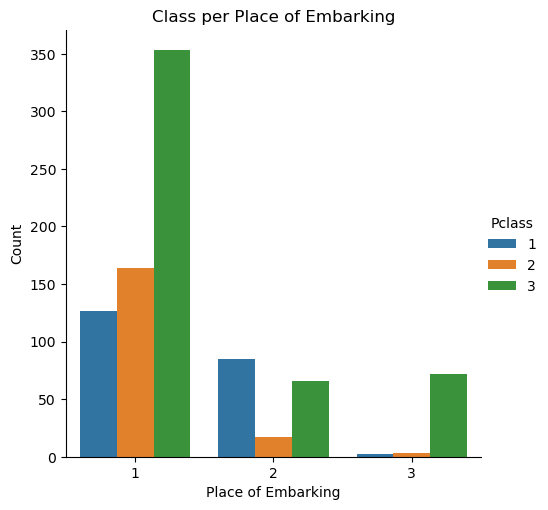

In [311]:
#class per place of embarking:
sns.catplot(data=df, x="Embarked", kind="count", hue="Pclass")
plt.xlabel("Place of Embarking")
plt.ylabel("Count")
plt.title("Class per Place of Embarking")

The place of embarking did not have very strong correlation to the survival of the passengers, though some correlation does seem to be present - passengers from Location 2 (c) had a noticeably higher survival rate (56%) than passengers from the other locations (33% and 37%).

When looking at the class of passengers from each place, one sees that Locations 1 (S) and Location 3 (Q) has a very large proportion of 3rd Class passengers. Considering that class had a very strong correlation with survival rates and that 3rd class passengers were much less likely to survive, it is understandable that, proportionately, these groups of passengers suffered much more losses than those from Location 2. At this point, it seems prident to drop this column.

#### Fare:

<Axes: >

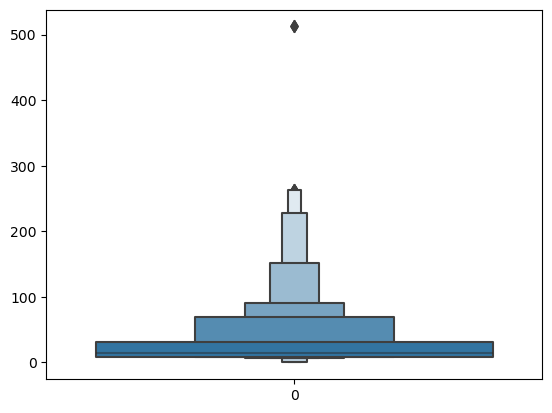

In [312]:
sns.boxenplot(df["Fare"])

In [313]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,2,30_40
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,2,30_40
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,2,30_40


There seems to be an outlier in the fare. However, looking closer, we see this was a first class ticket, so although it is a lot higher than the rest, we will leave it in as there were very possibly expensive tickets.

In [314]:
correlation=df.corr()
print(correlation["Survived"])

PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Age           -0.082446
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Embarked       0.108669
Name: Survived, dtype: float64


C:\Users\Noami\AppData\Local\Temp\ipykernel_16416\729821363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: xlabel='Fare', ylabel='Age'>

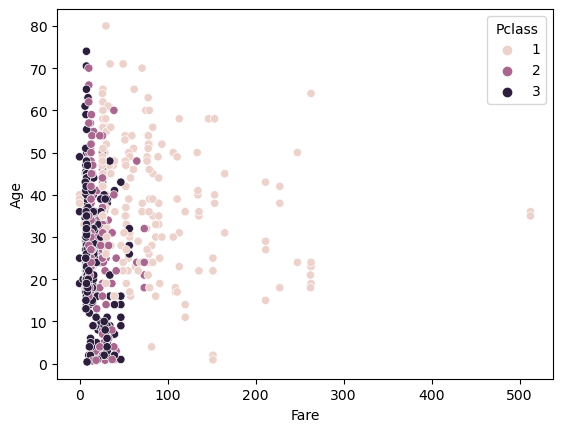

In [315]:
sns.scatterplot(data=df, x="Fare", y="Age", hue='Pclass')

There does not seem to be any correlation between fare and age. However, as we would expect, we do see a strong correlation between fare and class.

#### Parch:

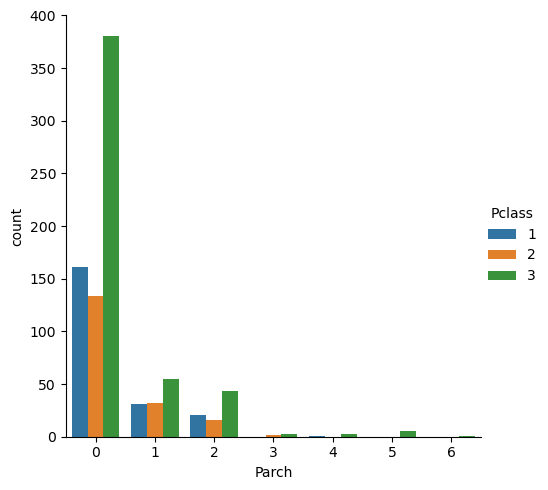

In [316]:
sns.catplot(data=df, x="Parch", kind="count", hue="Pclass")
plt.show()

The above visualisation shows how many parents/children each passenger had, and what class they were in. Most people travelled individually, but of those who travelled with more than 2 others, they were mainly in third class.

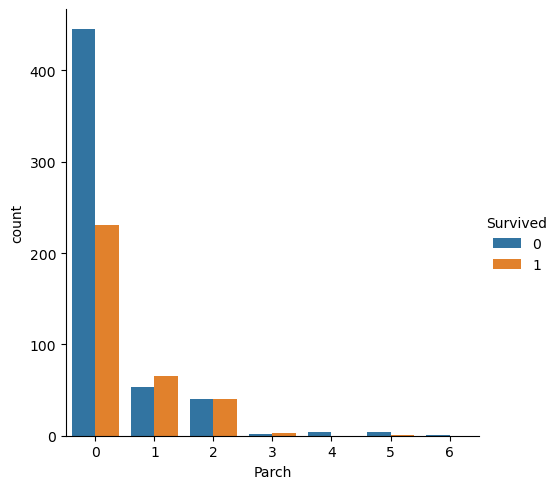

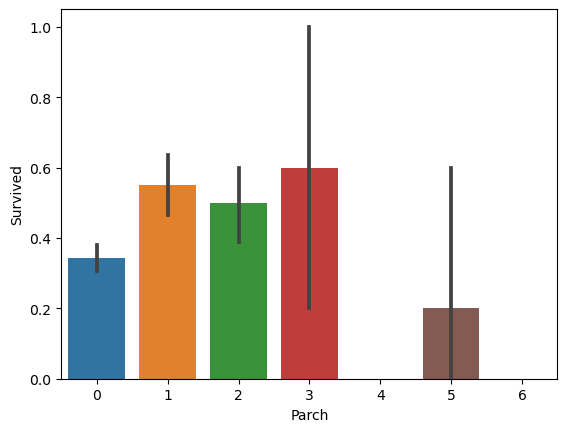

In [317]:
sns.catplot(data=df, x="Parch", kind="count", hue="Survived")
plt.show()
sns.barplot(x=df['Parch'],y=df['Survived'])
plt.show()

Here we see how if the parch affected how likely passengers were to survive. Those travelling with a lot of people had the lowest survival rate. This could either be, as we said above, because they were most probably third class passengers, or because since they were dependant on each other, they could not escape as easily. The independant travellers also seeem to have a low survival rate. We could assume these were mainly male adults, who were the last to be allowed on lifeboats. Those with a parch of 1 to 3 had the highest chance of survival. These were likely to include most of the children and woman, so this makes a lot of sense!

Text(0.5, 1.05, 'Correlation between Parch, survival and class')

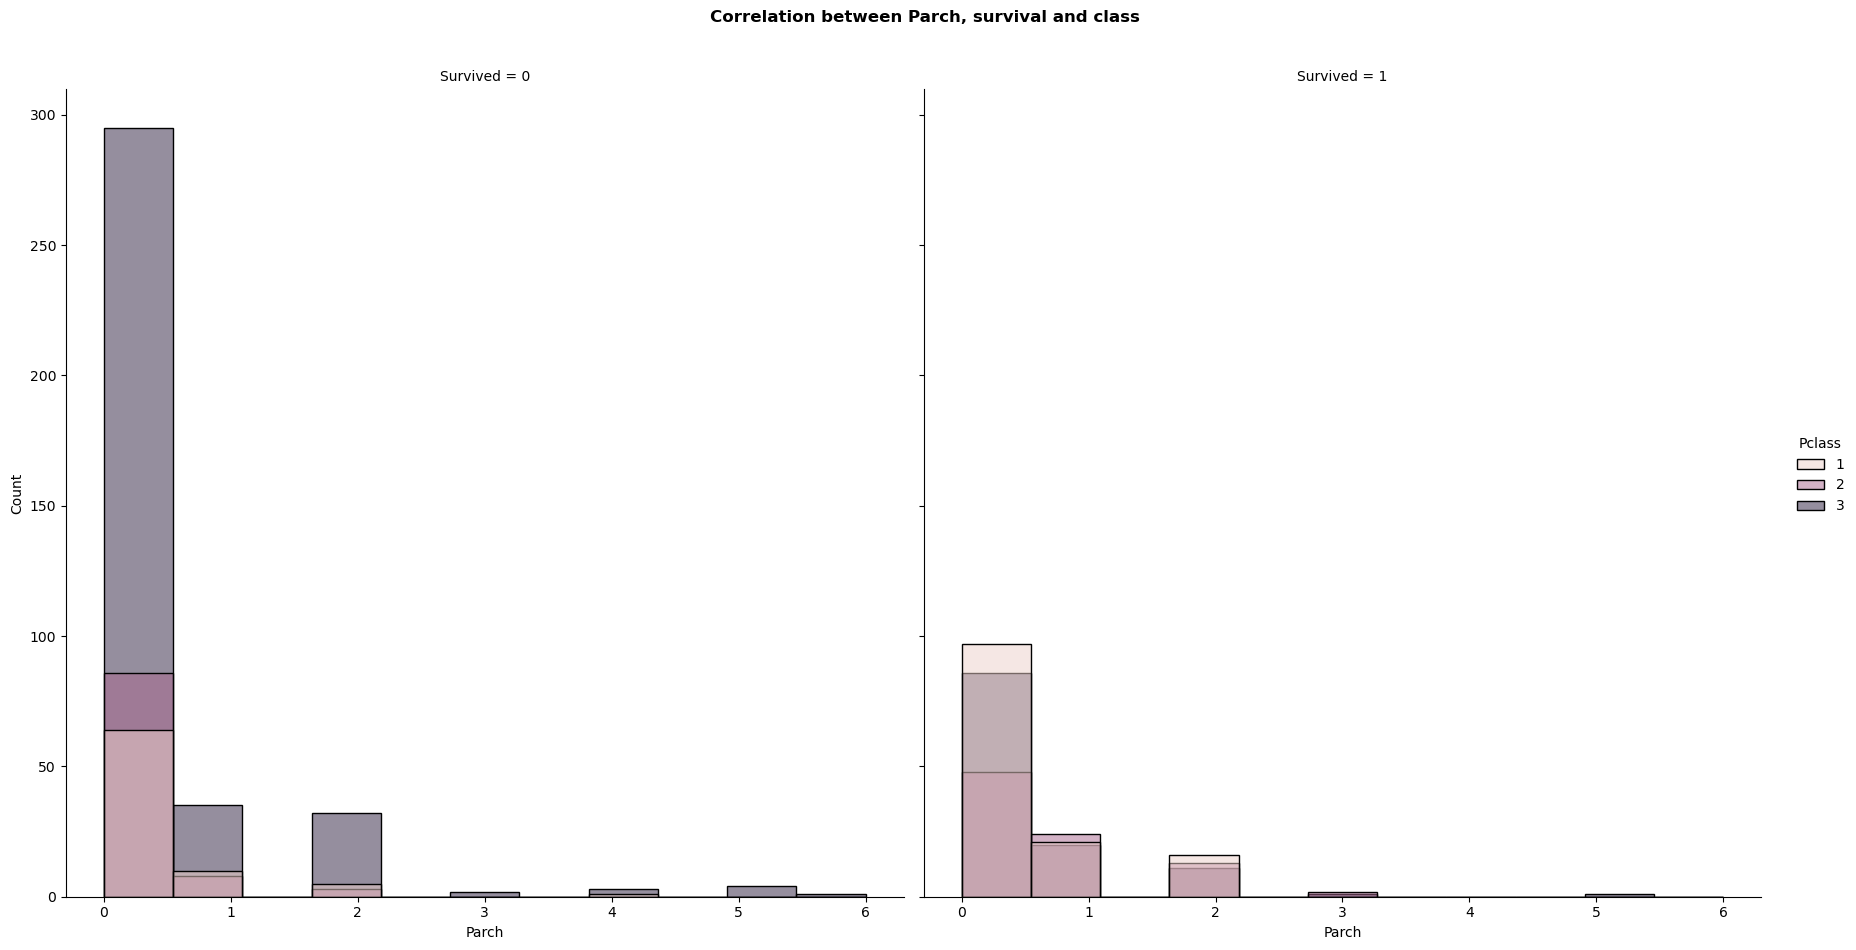

In [318]:
sns.displot(data=df,x='Parch', kde=False, col="Survived", hue="Pclass", height=9)
plt.suptitle("Correlation between Parch, survival and class", y=1.05, weight="demi")

#### Ticket:

There seems to be some patterns with the letters on the ticket numbers. we will try to analyse this further:

In [319]:
df['TicketPrefix']=df["Ticket"].str.extract(r'([^\d]*)')

In [320]:
df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('[.]', '', x) )

In [321]:
df['TicketPrefix']=df['TicketPrefix'].str.split('/').str[0]
df['TicketPrefix']=df['TicketPrefix'].str.split(' ').str[0]
df['TicketPrefix'] = df['TicketPrefix'].replace(r'^\s*$', "number ticket", regex=True)
df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('STON', 'SOTON', x) )

In [322]:
df["TicketPrefix"].unique()

array(['A', 'PC', 'SOTON', 'number ticket', 'PP', 'CA', 'SC', 'SP', 'SOC',
       'SO', 'W', 'WEP', 'C', 'SOP', 'Fa', 'LINE', 'FCC', 'SW', 'SCO',
       'P', 'WE', 'FC'], dtype=object)

Above, we have found grouped all the different ticket prefixes, and put those without a letter into another group. Below is the count of each ticket class within each group: 

In [323]:
df2=df[(df['TicketPrefix']!='number ticket')]
count={}
for val in df2["TicketPrefix"]:
        count[val]=(df2[(df2["TicketPrefix"]== val)]['Pclass'].value_counts())
for c in count:
        print(c, count[c])

A 3    29
Name: Pclass, dtype: int64
PC 1    60
Name: Pclass, dtype: int64
SOTON 3    35
Name: Pclass, dtype: int64
PP 3    3
Name: Pclass, dtype: int64
CA 3    22
2    20
Name: Pclass, dtype: int64
SC 2    15
3     1
Name: Pclass, dtype: int64
SP 3    1
Name: Pclass, dtype: int64
SOC 2    5
Name: Pclass, dtype: int64
SO 2    3
3    1
Name: Pclass, dtype: int64
W 3    7
2    3
Name: Pclass, dtype: int64
WEP 1    1
Name: Pclass, dtype: int64
C 3    5
Name: Pclass, dtype: int64
SOP 2    1
Name: Pclass, dtype: int64
Fa 3    1
Name: Pclass, dtype: int64
LINE 3    4
Name: Pclass, dtype: int64
FCC 2    5
Name: Pclass, dtype: int64
SW 2    2
Name: Pclass, dtype: int64
SCO 2    1
Name: Pclass, dtype: int64
P 2    2
Name: Pclass, dtype: int64
WE 1    2
Name: Pclass, dtype: int64
FC 1    1
Name: Pclass, dtype: int64


We see that most of the prefixes belong to a specific class. For example, all PC tickets were first class passengers. We will see below if the ticket type had any effect on survival/class:

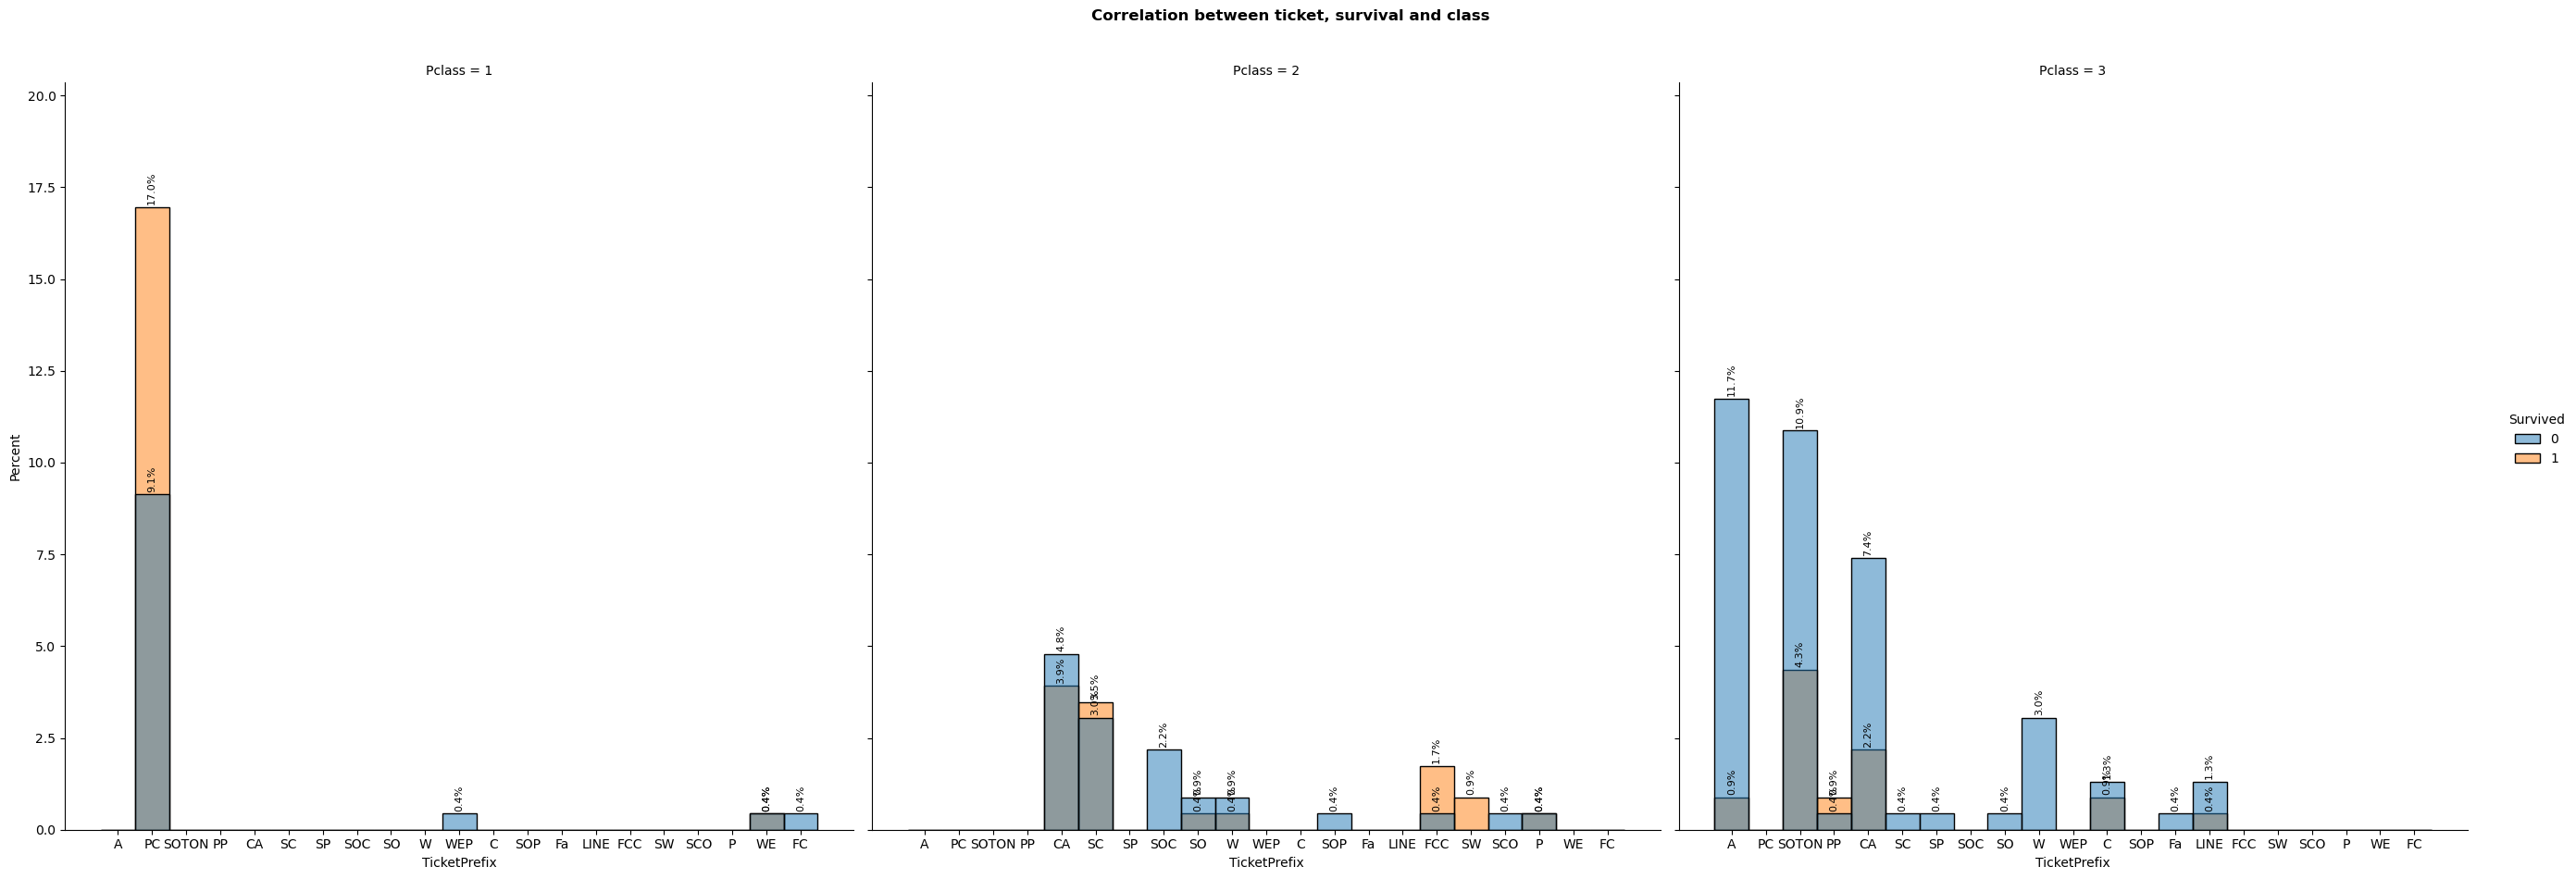

In [324]:
plot=sns.displot(data=df2,x='TicketPrefix', kde=False, col="Pclass", hue="Survived", stat='percent', height=9)
plt.suptitle("Correlation between ticket, survival and class", y=1.05, weight="demi")
for ax in plot.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)

plt.show()

We actually do see some pattern! All first class passengers who survived(except one) had a 'PC' ticket. We don't see much of a difference between ticket type for third class passengers and survival, except that those with a PP ticket had a higher survival rate. There are a few ticket prefixes in second classthat had a higher survival rate.
It is possible that the letters on the ticket showed a specific cabin type or location, and some cabins were closer to staircases or stairways.

### Cleaning Functions:
We have now analysed each column, and chosen which ones we we will use.
Below, we have combined all code that actually changes our data. We will use this in the python file. 

We have made functions for each data cleaning step.
We then split those functions into two. One function does any cleaning we want to do for our current dataset, as well as any new data we will receive. The second function calls the first function, and adds any further cleaning that we only want to apply to our train data. For example, changing null values, or dropping outliers.

In [325]:
# SINGLE CLEANING FUNCTIONS:

# read in data:
def read_data(filepath):
    df = pd.read_csv(filepath)
    return df

#change a column to a different datatype
def change_dtype(df, col, type):
    df[col] = df[col].astype(type)
    
# drop a column
def drop_col(df,col):
    df.drop(columns=col, axis = 1, inplace = True)
    
# change values of a column using a mapping dictionary
def change_type(df, col, map_dict):
    df[col] = df[col].map(map_dict)
    
# drop rows with nans in a specific column:
def drop_nan(df,col):
    df = df[df[col].notna()]
    
# fill in nan values in the age column, and remove outliers
def change_age(df,age):
    df.loc[(df['Age'].isnull())&(df['Fare']<40), 'Age']=29
    df.loc[(df['Age'].isnull())&(df['Fare']>40), 'Age']=34
    df = df[df[age] <= 74]
    
# create dummy columns:
def getDummies(df, col, dropfirst = True):
    df = pd.get_dummies(data = df, columns = [col], drop_first=dropfirst)
    return df

In [326]:
# COMBINED CLEANING FUNCTIONS:

# cleans all data:
def data_cleaning(csv):     
    df = read_data(csv)
    change_dtype(df,'Survived', int)
    drop_col(df,'Cabin')
    drop_col(df,'PassengerId')
    drop_col(df,'Name')
    drop_col(df,'Ticket')
    drop_col(df,'Embarked')
    #change_type(df,'Embarked',{'S':1,'C':2,'Q':3})
    df = getDummies(df, 'Sex')
    df = getDummies(df, 'Pclass', False)
    return df
  
# This is just for the TRAIN data. It calls the previous function, and adds any extra steps: 
def train_data_cleaning(csv):
    df = data_cleaning(csv)
    change_age(df,'Age')
    #drop_nan(df,'Embarked')
    return df


Using above functions, we will read in the data, clean it, and then take a quick look at our cleaned data.

In [327]:
# read in and clean TRAIN data:
df = train_data_cleaning('titanic_train.csv')
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1


In [328]:
corr = df.corr()
corr

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3
Survived,1.000000,-0.066128,-0.035322,0.081629,0.257307,-0.543351,0.285904,0.093349,-0.322308
Age,-0.066128,1.000000,-0.213289,-0.173097,0.104656,0.079629,0.329413,0.005105,-0.287978
SibSp,-0.035322,-0.213289,1.000000,0.414838,0.159651,-0.114631,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.173097,0.414838,1.000000,0.216225,-0.245489,-0.017633,-0.000734,0.015790
Fare,0.257307,0.104656,0.159651,0.216225,1.000000,-0.182333,0.591711,-0.118557,-0.413333
Sex_male,-0.543351,0.079629,-0.114631,-0.245489,-0.182333,1.000000,-0.098013,-0.064746,0.137143
Pclass_1,0.285904,0.329413,-0.054582,-0.017633,0.591711,-0.098013,1.000000,-0.288585,-0.626738
Pclass_2,0.093349,0.005105,-0.055932,-0.000734,-0.118557,-0.064746,-0.288585,1.000000,-0.565210
Pclass_3,-0.322308,-0.287978,0.092548,0.015790,-0.413333,0.137143,-0.626738,-0.565210,1.000000


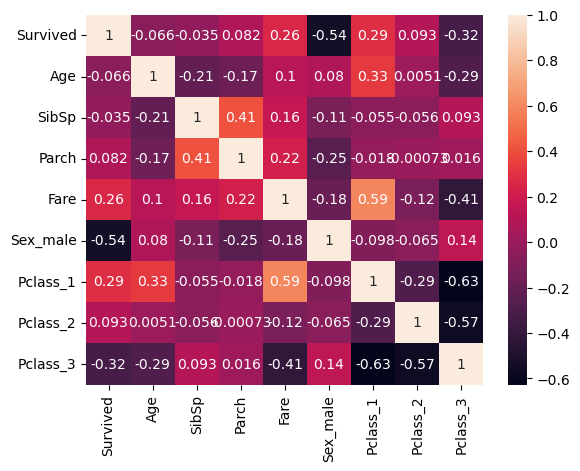

In [329]:
sns.heatmap(corr, annot = True)
plt.show()

Above is a heatmap of the correlation of our cleaned data. We can see the columns with the highest correlation are gender, class 1 and 3, and fare. This fits well with our analysis - we saw a clear pattern with gender, and class, and since fare correlates strongly with class, we could expect a correlation between survival and fare.

### Preparation Functions:

Below, we have functions that take a dataframe, and split/train it. As above, some functions are used just on the train data, and some will be used on any new data as well.

In [330]:
# Scale TRAIN data
def scale_train_data(X_train, scaler_type):
    scaler = scaler_type
    X_train_scaled = scaler.fit_transform(X_train)
    return X_train_scaled, scaler

# Scale TEST data or NEW data using existing scaler
def scale_new_data(new_data, scaler):
    new_data_scaled = scaler.transform(new_data)
    return new_data_scaled

# Splits cleaned TRAIN data, scales it(using above functions) and returns all.
def prep_data(df):
    X = df.drop('Survived', axis = 1) 
    y = df['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)
    X_train_scaled, scaler = scale_train_data(X_train, MinMaxScaler())
    X_test_scaled = scale_new_data(X_test, scaler)
    return X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler

Finally, we have a function for any unseen data. It takes the csv, and the scaler from the train data as inputs. It cleans the data using our cleaning function, then scales it using our scale function, returning the data before and after scaling.

In [331]:
#Cleans and scale NEW data:
def clean_scale_data(csv, scaler):
    test_data = data_cleaning(csv)
    test_data_scaled = scale_new_data(test_data, scaler)
    return test_data, test_data_scaled

In [332]:
# split and scale our TRAIN data:
X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = prep_data(df)

# Feature Selection:

# Models:

## Knn

## Linear Regression:

## Decision Tree

## Random Forest

# Conclusion